In [1]:
import keras
keras.__version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Yoann/anaconda2/envs/tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been through in episode 1, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its accuracy will still blow out of the water that of the densely-connected model episode 1.

## 1 - Defining the convolutional base

A basic convnet is a stack of `Conv2D` and `MaxPooling2D` layers. 
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via passing the argument `input_shape=(28, 28, 1)` to our first layer.

Let's build our convolutional base, using the `Sequential` API.

> Here's the network's building blocks : 
- Conv2D Layer : 32 filters, (3, 3) kernel, relu activation, input shape (28, 28, 1)
- MaxPooling2D : pool size (2, 2)
- Conv2D Layer : 64 filters, (3, 3) kernel, relu activation
- MaxPooling2D : pool size (2, 2)
- Conv2D Layer : 64 filters, (3, 3) kernel, relu activation

Documentation Conv2D: https://keras.io/layers/convolutional/#conv2d

Documentation MaxPooling2D: https://keras.io/layers/pooling/#maxpooling2d

In [2]:
from keras import layers
from keras import models

In [3]:
# Q1 : Create the layers of the convolutional base of the neural network using the Sequential API from Keras

model = models.Sequential()

# YOUR CODE BELOW
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to the `Conv2D` layers (e.g. 32 or 64).

## 2 - Feed the convolutional base into a densely-connected classifier network


The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top.

Let's build our densely-connected classifier, using the `Sequential` API.

> Here's the network's building blocks : 
- Flatten layer (no parameters)
- Dense Layer : 64 neurons, relu activation
- Dense Layer : 10 neurons, softmax activation

Documentation Flatten : https://keras.io/layers/core/#flatten

In [5]:
# Q2 : Create the last layers of the neural network using the Sequential API from Keras

# YOUR CODE BELOW
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation.

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

## 3 - Training the network

### 3.1 - Preprocess the input data

We will reuse a lot of the code we have already covered in the MNIST example from episode 1.

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 3.2 - Compile and fit the network

Now, let's train our convnet on the MNIST digits. 

Implement the following compilation step for your Neural Network : 
- "rmsprop" optimizer
- "categorical_crossentropy" loss
- metric : "accuracy"

Documentation : https://keras.io/getting-started/sequential-model-guide/#compilation

In [8]:
# Q3.2.1 : Add the compilation step to the network

# YOUR CODE BELOW
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


We will now train our model for 5 epochs (20 iterations over all samples in the `train_images` and `train_labels` tensors), in mini-batches of 64 samples.

Documentation : https://keras.io/models/sequential/#fit

In [9]:
# Q3.2.2 : Add the compilation step to the network

# YOUR CODE BELOW
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 26s 429us/step - loss: 0.1714 - acc: 0.9469
Epoch 2/5
60000/60000 [==============================] - 25s 417us/step - loss: 0.0474 - acc: 0.9858
Epoch 3/5
60000/60000 [==============================] - 24s 401us/step - loss: 0.0330 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 24s 407us/step - loss: 0.0253 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.0203 - acc: 0.9939


## 4 - Evaluate the model

Evaluate the model on the `test_images` and `test_labels` tensors.

Documentation : https://keras.io/models/model/#evaluate

In [10]:
# Q4 : Evaluate the model on the test data

# YOUR CODE BELOW
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 139us/step


In [11]:
test_acc

0.9916

While our densely-connected network from episode 1 had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we decreased our error rate by 68% (relative). Not bad! 

## 5 - Observing the errors

In [12]:
predictions = model.predict_classes(test_images).tolist()
true_labels = map(lambda one_hot: np.argmax(one_hot), test_labels.tolist())

indexes_errors = []
for index, val in enumerate(zip(predictions, true_labels)):
    if val[0] != val[1]:
        indexes_errors.append(index)

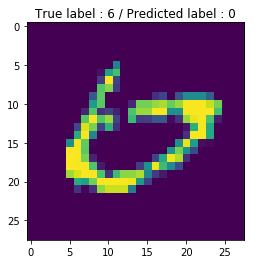

In [13]:
index = 3

plt.imshow(test_images[indexes_errors[index], :, :, 0])
plt.title("True label : %s / Predicted label : %s" % (true_labels[indexes_errors[index]], 
                                                      predictions[indexes_errors[index]]))
plt.show()